In [1]:
import pandas as pd
import requests
import config
import json
import numpy as np

In [2]:
df = pd.read_csv('resources/csv/2023_enrollment_numbers.csv')
df.head()

,School ID,School Name,Network,Governance,School Type,Community Area,Total,PE,PK,K,...,3,4,5,6,7,8,9,10,11,12
0,609772,ADDAMS,ISP,District,Traditional,EAST SIDE,553,21,40,50,...,57,56,51,56,60,65,0,0,0,0
1,610513,AIR FORCE HS,Network 16,District,Traditional,ARMOUR SQUARE,142,0,0,0,...,0,0,0,0,0,0,31,32,40,39
2,610212,ALBANY PARK,Network 1,District,Traditional,ALBANY PARK,221,0,0,0,...,0,0,0,0,100,121,0,0,0,0
3,609774,ALCOTT ES,Network 4,District,Traditional,LINCOLN PARK,602,0,110,54,...,57,52,50,56,53,67,0,0,0,0
4,610524,ALCOTT HS,Network 15,District,Traditional,NORTH CENTER,346,0,0,0,...,0,0,0,0,0,0,99,112,87,48


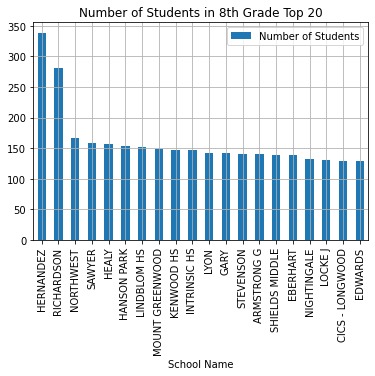

In [7]:
most_8th = df[['School Name','8']].sort_values('8', ascending=False)
most_8th = most_8th.rename(columns={'8': 'Number of Students'}).copy()
most_8th[most_8th['Number of Students'] > 0].set_index('School Name')[:20].plot(kind='bar', title="Number of Students in 8th Grade Top 20", grid=True).get_figure().savefig('resources/img/top_20_school.png', bbox_inches='tight')

In [4]:
google_df = pd.read_csv('resources/csv/googled_school_data.csv')
google_df = google_df.rename(columns={"school_name": 'School Name'})
google_df.head()

,School Name,lat,lng,form_addy,actual_name
0,ADDAMS,41.857052,-87.644926,"1814 S Union Ave, Chicago, IL 60616, United St...",Jane Addams High School
1,AIR FORCE HS,41.828009,-87.632846,"3630 S Wells St, Chicago, IL 60609, United States",Air Force Academy High School
2,ALBANY PARK,41.971105,-87.709609,"4929 N Sawyer Ave, Chicago, IL 60625, United S...",Albany Park Multicultural Academy
3,ALCOTT ES,41.929648,-87.645971,"2625 N Orchard St, Chicago, IL 60614, United S...",Alcott Elementary School
4,ALCOTT HS,41.935756,-87.680521,"2957 N Hoyne Ave, Chicago, IL 60618, United St...",Alcott College Prep


In [22]:
m_df = most_8th.merge(google_df, how='left', on='School Name')
m_df = m_df.dropna().copy()
m_df = m_df[m_df['form_addy'].str.contains('Chicago')]

In [50]:
import gmaps

gmaps.configure(api_key=config.GOOGLE_API_KEY)

chicago_coordinates = (41.881832,-87.623177)
locations = [(m_df['lat'].tolist()[x],m_df['lng'].tolist()[x],) for x in range(20)]
text = [f"Rank: {x}\nSchool Name{m_df['actual_name'].tolist()[x]}" for x in range(20)]
top_20_symbol_layer = gmaps.symbol_layer(
    locations,
    info_box_content=text,
    fill_color='blue', 
    stroke_color='blue'
)

locations = [(m_df['lat'].tolist()[x],m_df['lng'].tolist()[x],) for x in range(20, len(m_df))]
text = [f"Rank: {x}\nSchool Name{m_df['actual_name'].tolist()[x]}" for x in range(20, len(m_df))]
other_symbol_layer = gmaps.symbol_layer(
    locations,
    info_box_content=text,
    fill_color='red', 
    stroke_color='red'
)

fig = gmaps.figure(
    center=chicago_coordinates, 
    zoom_level=10, 
    layout={
        'width': '400px',
        'height': '600px',
        'padding': '3px',
        'border': '1px solid black'
    }
)
fig.add_layer(other_symbol_layer)
fig.add_layer(top_20_symbol_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', padding='3px', width='400px'))